In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/salary_data_cleaned.csv')

In [3]:
def title_simplifier(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'data analyst'
  elif 'machine learning engineer' in title.lower():
    return 'mle'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'na'

def seniority(title):
  if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
    return 'senior'
  elif 'jr' in title.lower() or 'jr.' in title.lower():
    return 'jr'
  else:
    return 'na'

In [4]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [5]:
df['seniority'] = df['Job Title'].apply(seniority)

In [6]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority
0,0,Business Analyst - Data Science,$37K - $68K (Glassdoor est.),Meet MedPro Group. We’re an industry-leading B...,3.7,"Fort Wayne, IN",501 to 1000 Employees,1899,Subsidiary or Business Segment,Insurance Carriers,Insurance,$1 to $2 billion (USD),0,0,37,68,52.5,MedPro Group,IN,122,0,0,0,0,1,data analyst,na
1,1,Software Engineer - Data Science,$37K - $68K (Glassdoor est.),Join ClearEdge and be a part of the team of me...,3.7,"Annapolis Junction, MD",51 to 200 Employees,2002,Company - Private,Computer Hardware & Software,Information Technology,$5 to $10 million (USD),0,0,37,68,52.5,ClearEdge,MD,19,0,0,0,0,1,na,na
2,2,Data Analyst,$37K - $68K (Glassdoor est.),This position will be responsible for the deve...,3.7,"Raleigh, NC",1001 to 5000 Employees,1976,Company - Private,Real Estate,Real Estate,$50 to $100 million (USD),0,0,37,68,52.5,Bell Partners,NC,45,0,0,0,0,0,data analyst,na
3,3,CLINICAL DATABASE MANAGER II,$37K - $68K (Glassdoor est.),The University of Alabama at Birmingham (UAB) ...,3.7,"Birmingham, AL",10000+ Employees,-1,College / University,Colleges & Universities,Education,$1 to $2 billion (USD),0,0,37,68,52.5,University of Alabama at Birmingham,AL,-1,0,0,0,0,0,na,na
4,4,Corporate Planning Analyst,$37K - $68K (Glassdoor est.),Waystar modernizes healthcare payments through...,3.7,"Louisville, KY",501 to 1000 Employees,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,0,37,68,52.5,Waystar,KY,-1,0,0,0,0,0,data analyst,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,575,Senior Data Scientist,$42K - $74K (Glassdoor est.),Driven by our mission to make it easier to und...,4.0,"San Francisco, CA",201 to 500 Employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,0,42,74,58.0,Collective Health,CA,8,1,0,0,0,0,data scientist,senior
426,576,Machine Learning Engineer,$42K - $74K (Glassdoor est.),Job Summary\nWe are looking for a Machine Lear...,4.0,"Abilene, TX",-1,-1,-1,-1,-1,-1,0,0,42,74,58.0,Ophthalmology Specialists of Te,TX,-1,1,0,0,0,0,mle,na
427,577,Data Scientist,$42K - $74K (Glassdoor est.),THE TEAM YOU WILL BE JOINING:\nOne of the larg...,4.0,"Charlotte, NC",51 to 200 Employees,2002,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),0,0,42,74,58.0,AccruePartners,NC,19,1,0,0,0,0,data scientist,na
428,578,Call Center Business Analyst,$42K - $74K (Glassdoor est.),Position Overview: The Business Support Analys...,4.0,"King of Prussia, PA",1001 to 5000 Employees,2015,Company - Private,Health Care Services & Hospitals,Health Care,$25 to $50 million (USD),0,0,42,74,58.0,Recovery Centers of America,PA,6,0,0,0,0,1,data analyst,na


In [7]:
df['job_simplified'].value_counts()

data scientist    137
na                137
data analyst       88
data engineer      28
director           22
mle                18
Name: job_simplified, dtype: int64

In [8]:
df['seniority'].value_counts()

na        336
senior     94
Name: seniority, dtype: int64

In [9]:
# Fix Los Angeles state
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    66
NY    45
VA    31
TX    28
MA    26
IL    22
DC    19
MD    18
WI    13
MO    12
GA    11
PA    10
FL     9
NC     9
te     9
WA     8
TN     6
MI     6
MN     6
UT     5
AZ     5
OR     5
es     5
IN     5
OH     5
KY     4
ia     4
AL     4
ME     3
NM     3
NJ     3
CO     3
NH     2
NE     2
ts     2
nd     2
ID     2
KS     2
CT     2
OK     1
IA     1
do     1
cs     1
ip     1
as     1
MS     1
SC     1
Name: job_state, dtype: int64

Job description length

In [10]:
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

Hourly wage into annual (2000 h is a year)

In [11]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly']==1 else x['min_salary'],axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly']==1 else x['max_salary'],axis=1)

In [12]:
df = df.drop('Unnamed: 0',axis=1)

**EDA**

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_length
count,430.000000,430.000000,430.0,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.941395,1574.260465,0.0,0.0,78.130233,132.995349,105.562791,32.730233,0.362791,0.006977,0.123256,0.190698,0.381395,2896.472093
std,0.369474,800.895427,0.0,0.0,41.785352,63.942391,52.787735,41.688900,0.481365,0.083332,0.329114,0.393309,0.486295,2130.589704
min,3.500000,-1.000000,0.0,0.0,30.000000,55.000000,42.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
25%,3.700000,1889.000000,0.0,0.0,42.000000,74.000000,58.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1044.250000
50%,3.900000,1984.000000,0.0,0.0,79.000000,131.000000,106.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2478.000000
75%,4.100000,2005.000000,0.0,0.0,100.000000,161.000000,130.500000,41.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4287.250000
max,4.700000,2018.000000,0.0,0.0,189.000000,301.000000,245.000000,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11746.000000


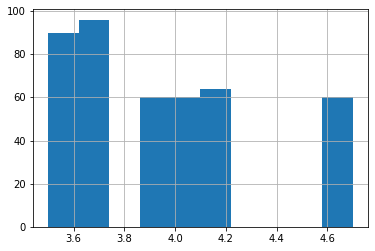

In [14]:
df['Rating'].hist()

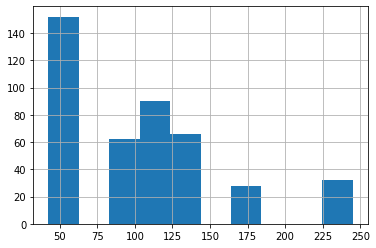

In [15]:
df['avg_salary'].hist()

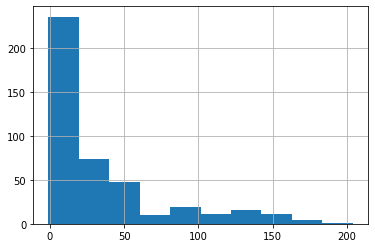

In [16]:
df['age'].hist()

Age is not normally distributed so we might have to normalize it

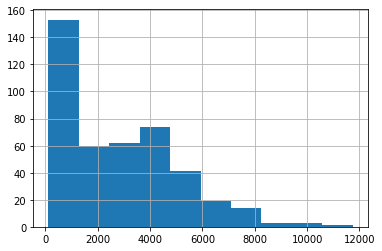

In [17]:
df['desc_length'].hist()

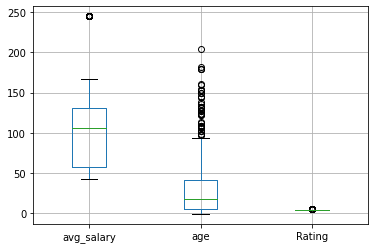

In [18]:
df.boxplot(column=['avg_salary','age','Rating'])

This is not normalized

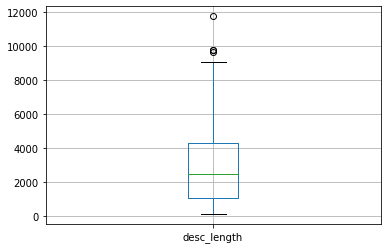

In [19]:
df.boxplot('desc_length')

In [20]:
corr = df[['desc_length','age','Rating','avg_salary']].corr()

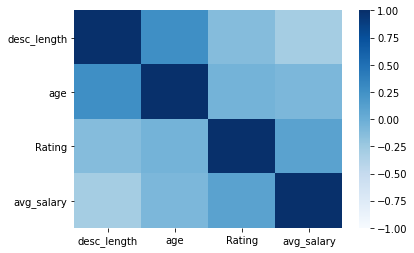

In [21]:
sns.heatmap(corr,
            xticklabels=['desc_length','age','Rating','avg_salary'],
            yticklabels=['desc_length','age','Rating','avg_salary'],
            cmap='Blues',vmin=-1,vmax=1)

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [23]:
df_cat = df[['Location','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','spark_yn','aws_yn','python_yn','r_yn',
           'excel_yn','seniority','job_simplified']]

graph for Location: total = 151


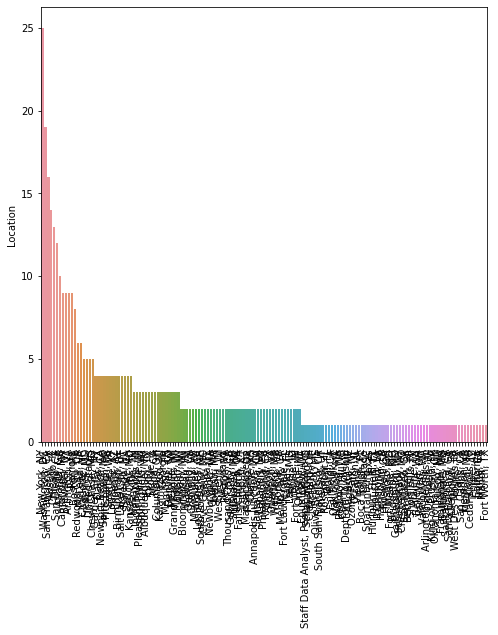

graph for Size: total = 9


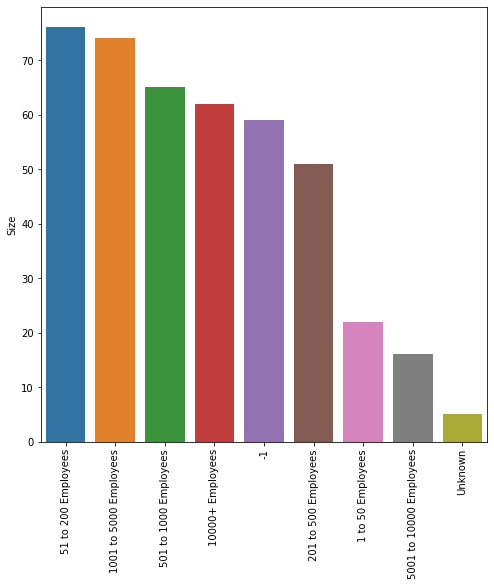

graph for Type of ownership: total = 9


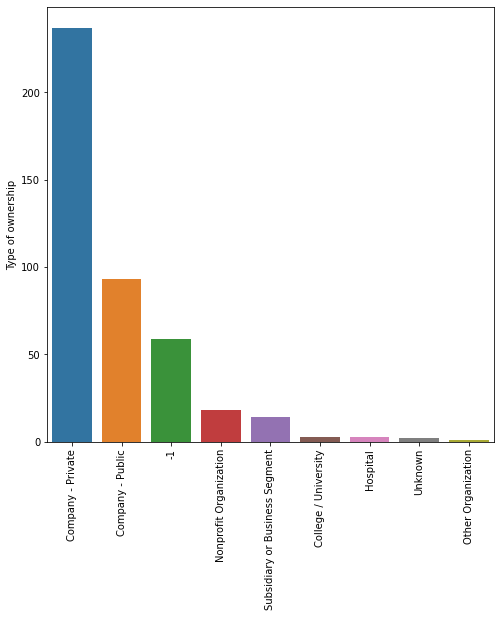

graph for Industry: total = 52


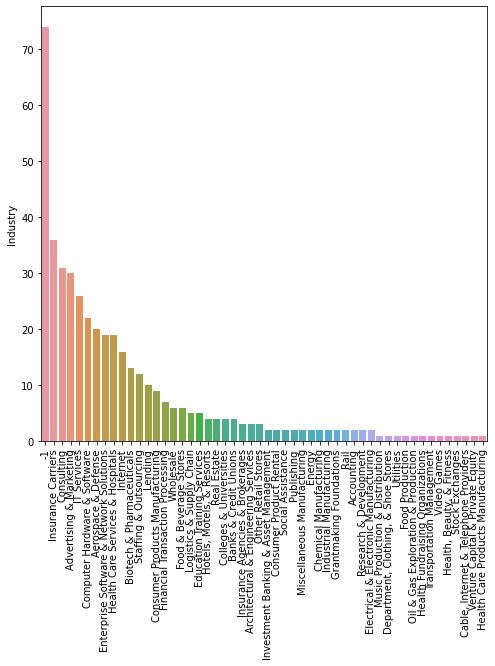

graph for Sector: total = 21


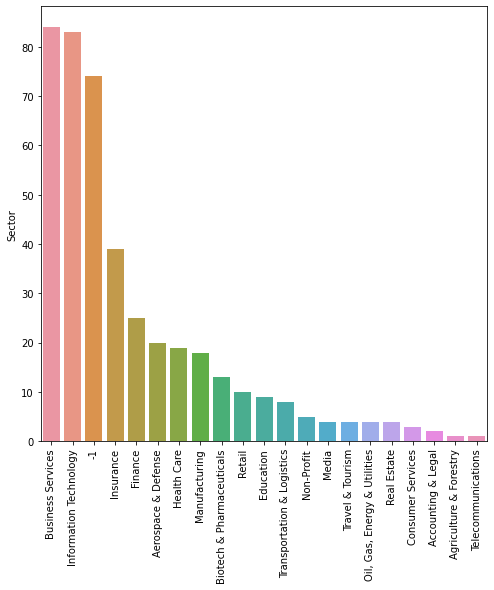

graph for Revenue: total = 14


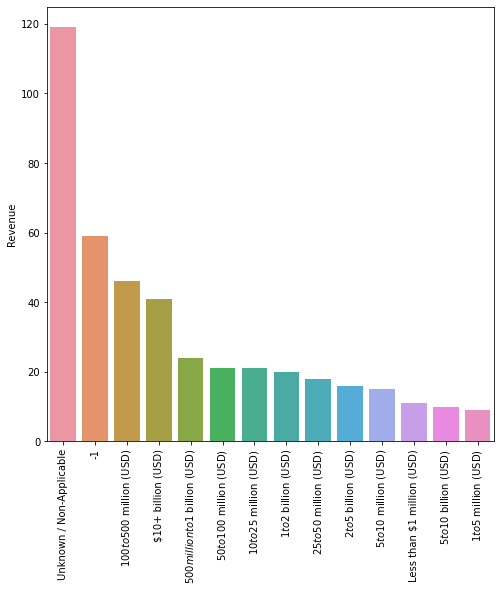

graph for company_txt: total = 268


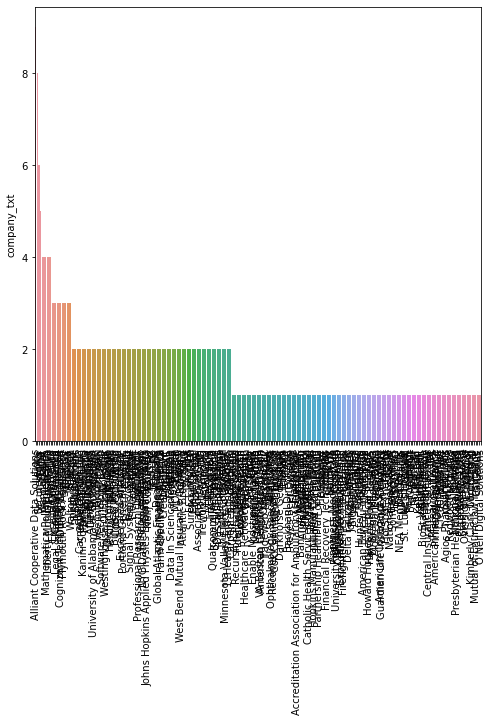

graph for job_state: total = 47


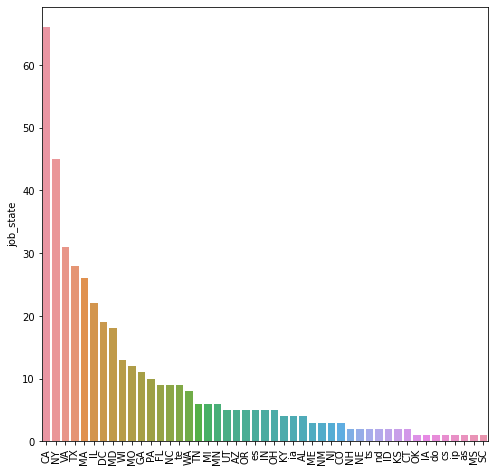

graph for spark_yn: total = 2


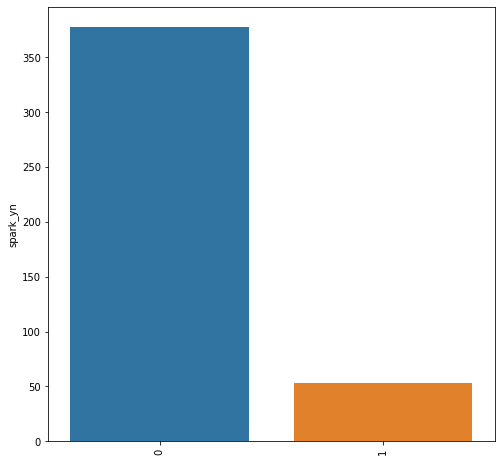

graph for aws_yn: total = 2


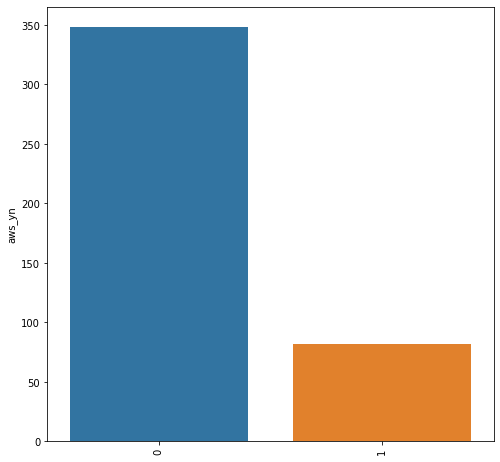

graph for python_yn: total = 2


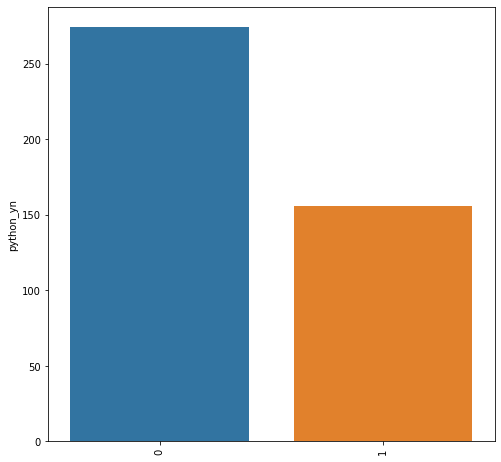

graph for r_yn: total = 2


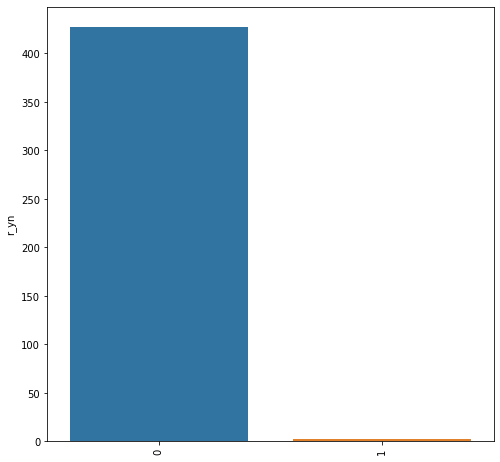

graph for excel_yn: total = 2


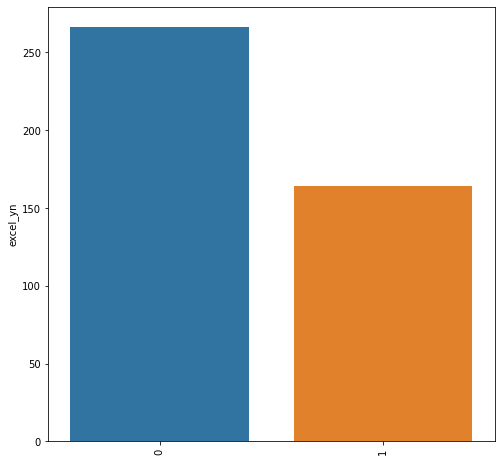

graph for seniority: total = 2


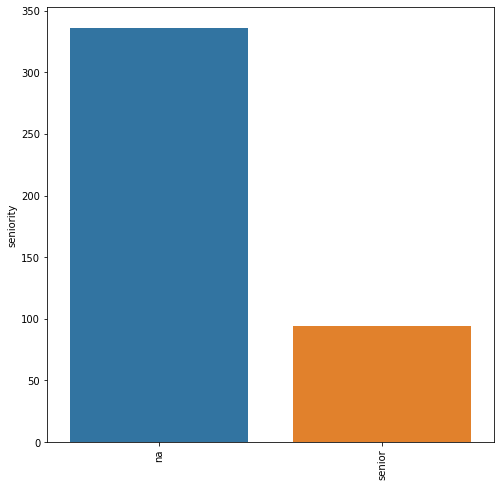

graph for job_simplified: total = 6


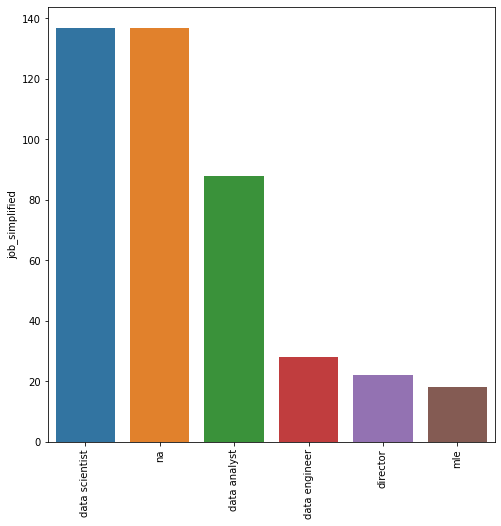

In [25]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print('graph for %s: total = %d'% (i, len(cat_num)))
  
  plt.figure(figsize=(8,8))
  sns.barplot(x=cat_num.index,y=cat_num)
  plt.xticks(rotation=90)
  plt.show()

graph for Location: total = 6


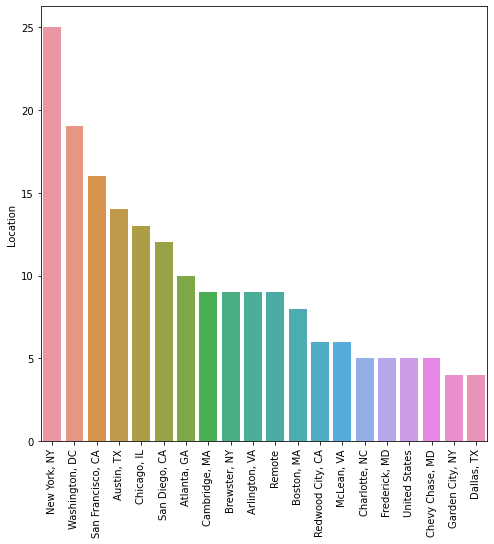

graph for company_txt: total = 20


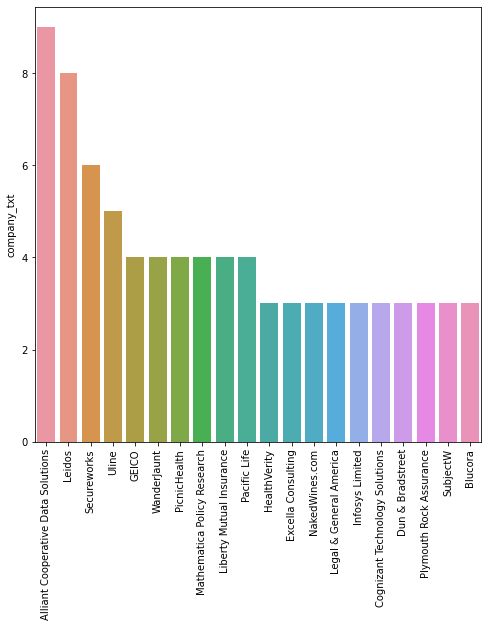

graph for job_state: total = 20


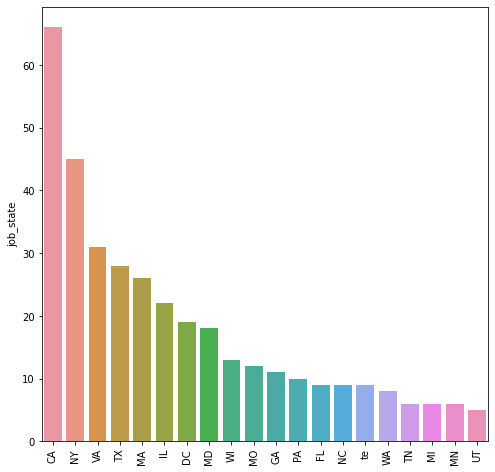

graph for Revenue: total = 20


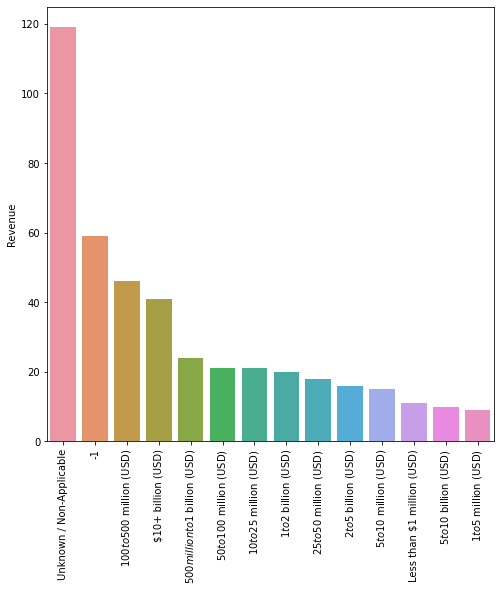

In [26]:
for i in df_cat[['Location','company_txt','job_state','Revenue']]:
  print('graph for %s: total = %d'% (i, len(cat_num)))
  cat_num = df_cat[i].value_counts()[:20] # Top 20
  plt.figure(figsize=(8,8))
  sns.barplot(x=cat_num.index,y=cat_num)
  plt.xticks(rotation=90)
  plt.show()

In [27]:
pd.pivot_table(df,index=['job_simplified','seniority'],values='avg_salary')

avg_salary
job_simplified seniority            
data analyst   na         103.805556
               senior      97.000000
data engineer  na          95.500000
               senior      42.500000
data scientist na          96.595960
               senior     101.736842
director       na         133.142857
               senior     245.000000
mle            na          87.687500
               senior     118.250000
na             na         117.147059
               senior     106.842857

In [28]:
pd.pivot_table(df,index=['job_state','job_simplified'],values='avg_salary').sort_values('job_state',ascending=True)


avg_salary
job_state job_simplified            
AL        na                  73.000
AZ        data scientist      62.500
          na                 139.375
CA        data analyst       102.100
          data engineer      107.500
...                              ...
te        data analyst       119.500
          data engineer       73.500
          data scientist     108.500
          na                  74.250
ts        data scientist     119.500

[117 rows x 1 columns]

In [29]:
pd.pivot_table(df,index=['job_state','job_simplified'],values='avg_salary',
               aggfunc='count').sort_values('job_state',ascending=True)


avg_salary
job_state job_simplified            
AL        na                       4
AZ        data scientist           1
          na                       4
CA        data analyst             5
          data engineer            1
...                              ...
te        data analyst             2
          data engineer            3
          data scientist           2
          na                       2
ts        data scientist           2

[117 rows x 1 columns]

In [32]:
pd.pivot_table(df[df['job_simplified']=='data scientist'],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=True)


,avg_salary
job_state,
TN,42.500000
WA,56.500000
PA,56.500000
NM,56.500000
IA,58.000000
AZ,62.500000
NJ,62.500000
GA,76.700000
MA,83.750000


Salary by Rating

In [35]:
pd.pivot_table(df,index='Rating',values='avg_salary')

,avg_salary
Rating,
3.5,119.5000
3.6,62.5000
3.7,115.3125
3.9,83.7500
4.0,50.2500
4.1,93.5000
4.2,245.0000
4.7,106.7500


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [40]:
df_pivots = df[['Rating','Industry','Sector','Revenue','hourly','employer_provided','python_yn',
              'r_yn','spark_yn','aws_yn','excel_yn','desc_length','avg_salary']]

In [50]:
for i in df_pivots.columns[:-1]: # Excludes 'avg_salary'
  print(i)
  print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=True))

Rating
        avg_salary
Rating            
4.0        50.2500
3.6        62.5000
3.9        83.7500
4.1        93.5000
4.7       106.7500
3.7       115.3125
3.5       119.5000
4.2       245.0000
Industry
                                         avg_salary
Industry                                           
Chemical Manufacturing                    42.500000
Department, Clothing, & Shoe Stores       42.500000
Venture Capital & Private Equity          58.000000
Cable, Internet & Telephone Providers     58.000000
Consumer Product Rental                   73.000000
Consumer Products Manufacturing           74.055556
IT Services                               75.326923
Colleges & Universities                   79.750000
Social Assistance                         81.250000
Financial Transaction Processing          81.857143
Electrical & Electronic Manufacturing     82.000000
Miscellaneous Manufacturing               83.750000
Insurance Agencies & Brokerages           85.833333
Energy        

In [53]:
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),9,11
$1 to $5 million (USD),2,7
$10 to $25 million (USD),10,11
$10+ billion (USD),31,10
$100 to $500 million (USD),34,12
$2 to $5 billion (USD),6,10
$25 to $50 million (USD),11,7
$5 to $10 billion (USD),4,6
$5 to $10 million (USD),14,1


### **World Cloud**

In [61]:
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

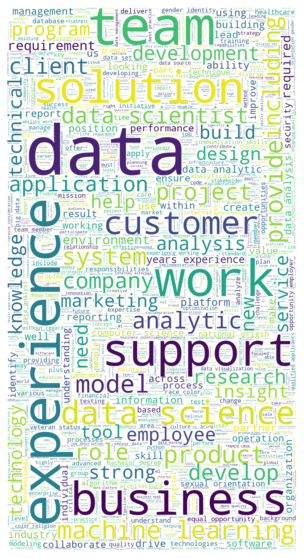

In [64]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()